# Advanced Data Analysis - assignment 1

This notebook contains the **Assignment 1** of the Advanced Data Analysis course.

The topic of the assignment consists in performing multiple analysis on weather information, more specifically information about temperature and precipitation.

The data in the dataset provided was obtained from NOAA ([https://www.ncei.noaa.gov/metadata/geoportal/rest/metadata/item/gov.noaa.ncdc:C00861/html](https://www.ncei.noaa.gov/metadata/geoportal/rest/metadata/item/gov.noaa.ncdc:C00861/html)).



### DEADLINE: 28-September-2022

The assignment is **individual**. You should submit your resolution on Moodle by the deadline. 

Students have **three grace days** that they can use for all assignments and group project, which allows them to deliver the projects late. Use these grace days carefully.

[//]: # (We will be using latex for fomulas)

<script type="text/javascript"
        src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.0/MathJax.js?config=TeX-AMS_CHTML"></script>


### Preliminaries

Just import the libraries that will be needed throughout the assignment.

In [25]:
# imports pandas
import pandas as pd

import os

import matplotlib.pyplot as plt
plt.style.use('seaborn')

import numpy as np


## Datasets

For solving the questions posed, you have the following datasets available.

### Weather dara

File ```assignment1/weather.csv``` contains the information about the weather in a set of weather stations located around the world. The dataset includes the following columns:
* date, a date in the format year-month-day (e.g. 1995-01-31):
* id, the id of the weather station;
* tmax, the maximum temperature registered in the given day and weather station (in tenth of degrees);
* tmin, the minimum temperature registered in the given day and weather station (in tenth of degrees);
* prcp, the percipitation registered in the given day and weather station;

The dataset does not includes data for all stations for all the dates - while for some stations, data starts in 1950, for others stations it is available only is shorter intervals; even for stations for which data is available from 1950, the data is missing for some days.

File ```assignment1/stations.csv``` contains information about weather stations. The dataset includes the following columns:
* id, the id of the weather stations;
* lat, the latitude of the stations;
* lon, the longitude of the stations;
* alt, the altitude of the stations;
* name, with the name of the weather station;
* cid, with the code id for the country;


File ```assignment1/regions.csv``` contains information about regions. The dataset includes the following columns:
* region, with the region in which the country is located;
* country, the country name;
* cid, with the code id for the country.


The following given code loads the datasets.


In [3]:
dataFileName = os.path.join( "assignment1", "weather.csv")

dataDF = pd.read_csv("/Users/adi/Desktop/weather.csv")
dataDF["date"] = pd.to_datetime(dataDF["date"], format="%Y-%m-%d")

print(dataDF.head(5))

            id       date  tmax  tmin  prcp
0  ASN00066062 1950-01-01   199   176    61
1  ASN00066062 1950-01-02   275   171   224
2  ASN00066062 1950-01-03   233   166    20
3  ASN00066062 1950-01-04   248   178     0
4  ASN00066062 1950-01-05   271   182     0


In [5]:
stationsFileName = os.path.join( "assignment1", "stations.csv")

stationsDF = pd.read_csv("/Users/adi/Desktop/stations.csv")

print(stationsDF.head(5))

            id      lat      lon     alt                   name cid
0  ACW00011604  17.1167 -61.7833    10.1  ST JOHNS COOLIDGE FLD  AC
1  ACW00011647  17.1333 -61.7833    19.2               ST JOHNS  AC
2  AE000041196  25.3330  55.5170    34.0    SHARJAH INTER. AIRP  AE
3  AF000040930  35.3170  69.0170  3366.0           NORTH-SALANG  AF
4  AG000060390  36.7167   3.2500    24.0     ALGER-DAR EL BEIDA  AG


In [6]:
regionsFileName = os.path.join( "assignment1", "regions.csv")

regionsDF = pd.read_csv("/Users/adi/Desktop/regions.csv")

print(regionsDF.head(5))

          region               country cid
0  North America         United States  US
1    Middle East  United Arab Emirates  AE
2         Africa              Ethiopia  ET
3         Africa               Algeria  AG
4           Asia            Kazakhstan  KZ


## Question 1 (6 points)

In this question, we start by exploring the data available with simple queries. In you answers, you can use the data computed in the previous one, when usefull.


### **1.a)** What are the three highest and lowest temperatures and the maximum precipitation registered, when and in which station were they registered?


In [266]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.
combined1DF = dataDF.join(stationsDF.set_index("id"), on = "id")
combinedDF = combined1DF.join(regionsDF.set_index("cid"), on = "cid")
combinedDF.head()

print('\nTop 3 tmax:')
print(combinedDF[['date','tmax','name']].nlargest(3, 'tmax'))
print('\nTop 3 tmin:')
print(combinedDF[['date','tmin','name']].nsmallest(3, 'tmin'))
print('\nTop 1 prcp:')
print(combinedDF[['date','prcp','name']].nlargest(1, 'prcp'))


Top 3 tmax:
            date  tmax                       name
23005 2013-01-18   458  SYDNEY (OBSERVATORY HILL)
20439 2006-01-01   442  SYDNEY (OBSERVATORY HILL)
24816 2018-01-07   434  SYDNEY (OBSERVATORY HILL)

Top 3 tmin:
            date  tmin     name
33077 1969-12-21  -245  POTSDAM
28013 1956-02-09  -230  POTSDAM
28005 1956-02-01  -219  POTSDAM

Top 1 prcp:
            date  prcp                       name
13363 1986-08-06  3276  SYDNEY (OBSERVATORY HILL)


### 1.b) Print the information for the top-3 days with the highest and lowest temperature and the maximum precipitation in station PO000008535 (Lisbon).


In [267]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.
lisbonDF = combinedDF[combinedDF['id'] == 'PO000008535']

print('\nTop 3 tmax:')
print(lisbonDF[['date', 'name', 'tmax']].nlargest(3, 'tmax'))
print('\nTop 3 tmin:')
print(lisbonDF[['date', 'name', 'tmin']].nsmallest(3, 'tmin'))
print('\nTop 1 prcp:')
print(lisbonDF[['date', 'name', 'prcp']].nlargest(1, 'prcp'))


Top 3 tmax:
            date              name  tmax
76826 2018-08-04  LISBOA GEOFISICA   420
63626 1981-06-13  LISBOA GEOFISICA   415
67312 1991-07-17  LISBOA GEOFISICA   406

Top 3 tmin:
            date              name  tmin
53636 1954-02-05  LISBOA GEOFISICA    -9
54372 1956-02-11  LISBOA GEOFISICA    -8
54373 1956-02-12  LISBOA GEOFISICA    -8

Top 1 prcp:
            date              name  prcp
73006 2008-02-18  LISBOA GEOFISICA  1024


### 1.c) For Lisbon, how many days had maximum temperature higher or equal to 30ºC, per year, since 1970?

**NOTE:** in a DataFrame ```df```, with column ```d``` with a datetime, it is possible to access the year with ```df["d"].dt.year```.


In [67]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.
lisbon1970DF = lisbonDF[lisbonDF['date'] >= '1970-01-01']
lisbon1970DF = lisbon1970DF[lisbon1970DF['tmax'] >= 300]
lisbon1970DF['year'] = lisbon1970DF['date'].dt.year
lisbon1970DF[['year','tmax']].groupby(['year']).count()

,tmax
year,
1970,26
1971,17
1972,8
1973,22
1974,33
1975,18
1976,25
1977,16
1978,28


### 1.d) Print information about the top-10 days with the largest temperature difference?


In [47]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.
combinedDF['temp_dif'] = combinedDF['tmax'] - combinedDF['tmin']
combinedDF.nlargest(10, 'temp_dif')


,id,date,tmax,tmin,prcp,lat,lon,alt,name,cid,region,country,temp_dif
23005,ASN00066062,2013-01-18,458,217,0,-33.8607,151.2050,39.0,SYDNEY (OBSERVATORY HILL),AS,Australia/South Pacific,Australia,241
2883,ASN00066062,1957-11-24,384,166,0,-33.8607,151.2050,39.0,SYDNEY (OBSERVATORY HILL),AS,Australia/South Pacific,Australia,218
2909,ASN00066062,1957-12-20,422,206,8,-33.8607,151.2050,39.0,SYDNEY (OBSERVATORY HILL),AS,Australia/South Pacific,Australia,216
45265,GM000003342,2003-05-05,307,91,0,52.3833,13.0639,81.0,POTSDAM,GM,Europe,Germany,216
22995,ASN00066062,2013-01-08,423,209,0,-33.8607,151.2050,39.0,SYDNEY (OBSERVATORY HILL),AS,Australia/South Pacific,Australia,214
42330,GM000003342,1995-04-22,269,55,0,52.3833,13.0639,81.0,POTSDAM,GM,Europe,Germany,214
67737,PO000008535,1992-09-14,360,147,0,38.7167,-9.1500,77.0,LISBOA GEOFISICA,PO,Europe,Portugal,213
671,ASN00066062,1951-11-03,350,138,0,-33.8607,151.2050,39.0,SYDNEY (OBSERVATORY HILL),AS,Australia/South Pacific,Australia,212
13827,ASN00066062,1987-11-13,326,115,68,-33.8607,151.2050,39.0,SYDNEY (OBSERVATORY HILL),AS,Australia/South Pacific,Australia,211
51452,GM000003342,2020-04-12,245,34,27,52.3833,13.0639,81.0,POTSDAM,GM,Europe,Germany,211


### 1.e) Find maximum values for all weather stations

For all weather stations, print their respective highest temperature, lowest temperature and maximum precipitation since 1970.


In [150]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.
combinedDF_stations = combinedDF.groupby(['name']).max()
combinedDF_stations_min = combinedDF.groupby(['name']).min()
combinedDF_stations['tmin'] = combinedDF_stations_min['tmin']
combinedDF_stations[[ 'tmax', 'tmin', 'prcp','id']]

,tmax,tmin,prcp,id
name,,,,
LISBOA GEOFISICA,420,-9,1024,PO000008535
POTSDAM,386,-245,1048,GM000003342
SYDNEY (OBSERVATORY HILL),458,27,3276,ASN00066062


## Question 2 (5 points)

This second question focus on processing the information on a time series for plotting it.


### 2.a) Display the information about temperatures and precipitation for a single station of your choice from 2018 to 2019.

Plot the information about temperatures and percipitation in some selected station from 2018 to 2019. In your answer consider that it would be useful to have access not only to the raw data but also to observe the trend of temperature variability over the year, without being too impacted by the natural day-to-day variability.

In the rationale of your solution, discuss the parameters used to smooth the lines.


<AxesSubplot:title={'center':'Lisbon Temperature and Weather (2018 - 2019)'}, xlabel='month', ylabel='Temp(in tenth of degrees)/ Prcp'>

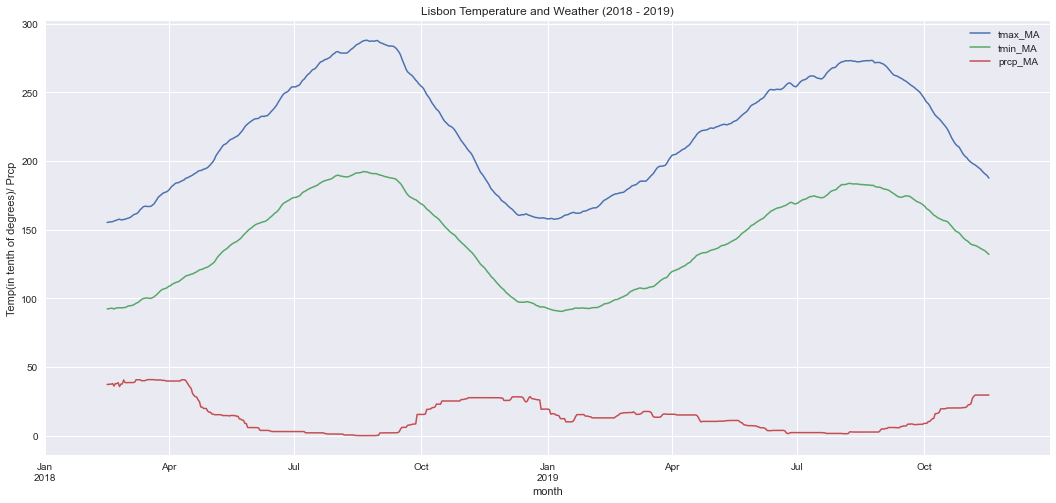

In [433]:
#Solve question here. Briefly justy you solution in the following markdown cell.
#creating and editing lisbon dataframe
lisbon18_19DF = lisbonDF.loc[(lisbonDF['date'] >= '2018-01-01')
                     & (lisbonDF['date'] <= '2019-12-31')]
lisbon18_19DF['date'].dt.to_period('M')

#grouping the data based on date
lisbon18_19DF_grouped = lisbon18_19DF.groupby('date').mean()

#creating moving averages
lisbon18_19DF_grouped['tmax_MA'] = lisbon18_19DF_grouped['tmax'].rolling(90, center = True).mean()
lisbon18_19DF_grouped['tmin_MA'] = lisbon18_19DF_grouped['tmin'].rolling(90, center = True).mean()
lisbon18_19DF_grouped['prcp_MA'] = lisbon18_19DF_grouped['prcp'].rolling(90, center = True).mean()

#ploting
lisbon18_19DF_grouped[['tmax_MA', 'tmin_MA', 'prcp_MA']].plot(linewidth = 1.5, title = 'Lisbon Temperature and Weather (2018 - 2019)', xlabel ='month', ylabel ='Temp(in tenth of degrees)/ Prcp',figsize=(18,8))


**Rationale:** in order to smooth the lines, I took 3 steps:

First, I created a lisbon dataframe with all its data. I also edited the date column so that month-year are displayed in the plot later on.
Second, I grouped the data by 'date'.
Third, I created moving averages with k=90 to have quartely averages and smoother lines.

### 2.b) Display long-term trends.

In this question we want to verify the long term trends. In particular, we want to know whether the average temperature or difference between maximum and minimum temperature has been increasing over the years or the precipiation has been descreasing in the full period for which data is available, without being too much impacted by the natural variability over each year. 

NOTE: compute the average temperature in a day as the average between the maximum and minimum temperatures of that day.

Select 2 weather stations in different continents, compute the necessary data and plot it.

<AxesSubplot:title={'center':'Australia vs Portugal Weather Trends'}, xlabel='year', ylabel='Temp(in tenth of degrees) / Prcp'>

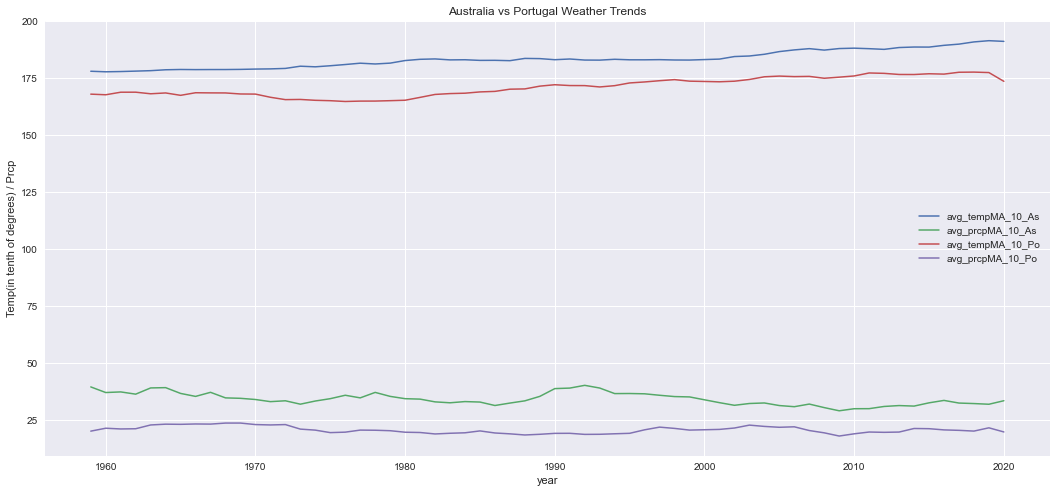

In [434]:
#creating new columns 'avg_temp'and 'year'
combinedDF['avg_temp'] = (combinedDF['tmax'] + combinedDF['tmin']) / 2
combinedDF['year'] = combinedDF['date'].dt.year

#creating new dataframes for Australia (As) and Portugal (Po)
As_DF = combinedDF[combinedDF['cid'] == 'AS']
Po_DF = combinedDF[combinedDF['cid'] == 'PO']

#grouping the data based on year
As_DF_grouped = As_DF.groupby('year').mean()
Po_DF_grouped = Po_DF.groupby('year').mean()

#creating moving averages avg_temp and prcp for each location
As_DF_grouped['avg_tempMA_10_As'] = As_DF_grouped['avg_temp'].rolling(10, center = False).mean()
As_DF_grouped['avg_prcpMA_10_As'] = As_DF_grouped['prcp'].rolling(10, center = False).mean()
Po_DF_grouped['avg_tempMA_10_Po'] = Po_DF_grouped['avg_temp'].rolling(10, center = False).mean()
Po_DF_grouped['avg_prcpMA_10_Po'] = Po_DF_grouped['prcp'].rolling(10, center = False).mean()

#merging the two dataframes
TrendsDF = pd.merge(As_DF_grouped[['avg_tempMA_10_As','avg_prcpMA_10_As']],Po_DF_grouped[['avg_tempMA_10_Po','avg_prcpMA_10_Po']], on='year')

TrendsDF.plot(linewidth = 1.5, title = 'Australia vs Portugal Weather Trends', xlabel ='year',ylabel ='Temp(in tenth of degrees) / Prcp',figsize=(18,8))



**Rationale:** To directly compare the longterm temp. and prcp evolution of two stations with eachother, I decided to focus on Australia (Sydney Station) and Portugal (Lisbon Station).

Considering the granuality, I decided two take 2 steps: 
First, compunting the monthly average of 'avg_temp' and 'prcp' by grouping the DFs by month.
Second, by computing the moving averages on the average monthly temperatures and prcp of each location with k=10.

The graph shows that for both locations, the longterm trend for the temperatures (blue and red) are clearly positive. For the percipitation however, there is neither a clear upwards or downwards trend for Portugal (Lisbon) or Australia (Sydney).

    

## Question 3 (4 points)

This third question focus on understanding the relations between weather elements.


### 3.a) Is there any relation between different weather elements for a given city?

For a given weather station, let's start by investigating if there is a relation between the different weather elements.



In [127]:
#Solve question here. Briefly justy you solution in the following markdown cell.
lisbonDF[['tmax', 'prcp']].corr()


,tmax,prcp
tmax,1.000000,-0.209488
prcp,-0.209488,1.000000


**Present an interpretation of the results here:** in Portugal, there is a  weak negative correlation between the max temperature and precipitation of a given day. The Pearson correlation coefficient of the two is approx. -0.21, indicating that the probability of rain is usually lower on days with higher temperatures and vice versa.

### 3.b) Is there a relation between weather elements in different cities?

Select three cities, two of which you believe have similar weather and other with different weather and use the studied methods to confirm you intuitions (or not) for the different weather elements.

In the Markdown cell below your code, comment the results obtained.



In [269]:
#Solve question here. Briefly justy you solution in the following markdown cell.
#creating sub-DF for each location
sydneyDF = combinedDF[combinedDF['id'] == 'ASN00066062']
potsdamDF = combinedDF[combinedDF['id'] == 'GM000003342']

#copies
lisbonDF2 = lisbonDF.copy()
sydneyDF2 = sydneyDF.copy()
potsdamDF2 = potsdamDF.copy()

#renaming columns and preparing join
lisbonDF2.rename(columns = {'tmax':'tmaxLIS'}, inplace = True)
sydneyDF2.rename(columns = {'tmax':'tmaxSYD', 'prcp':'prcpSYD'}, inplace = True)
potsdamDF2.rename(columns = {'tmax':'tmaxPOT', 'prcp':'prcpPOT'}, inplace = True)

#joining data from different locations
LisSydDF = lisbonDF2.join(sydneyDF2[['date', 'tmaxSYD', 'prcpSYD']].set_index('date'), on = 'date')
LisPotDF = lisbonDF2.join(potsdamDF2[['date', 'tmaxPOT', 'prcpPOT']].set_index('date'), on = 'date')

print('\nCorrelation LIS/SYD')
print(LisSydDF[['tmaxLIS', 'tmaxSYD']].corr())
print('\nCorrelation LIS/POT')
print(LisPotDF[['tmaxLIS', 'tmaxPOT']].corr())


Correlation LIS/SYD
          tmaxLIS   tmaxSYD
tmaxLIS  1.000000 -0.565191
tmaxSYD -0.565191  1.000000

Correlation LIS/POT
          tmaxLIS   tmaxPOT
tmaxLIS  1.000000  0.716515
tmaxPOT  0.716515  1.000000


**Rationale and comments:** as Lisbon and Sydney are on different hemispheres, it makes sense that correlation between tmax is negatively correlated (summer in Lisbon = winter in Sydney). As Lisbon and Potsdam are both situated in europe and affected by the same seasons, their tmax is positvely correlated with eachother (0.72)

## Question 4 (5 points)

This fourth question focus on doing analysis at a country or region-scale.
.

### 4.a) Display the higest and lowest temperature and highest percipitation in each region


In [398]:
dataDF2 = pd.read_csv("/Users/adi/Desktop/weather2.csv")
combined3DF = dataDF2.join(stationsDF.set_index("id"), on = "id")
combinedDF2 = combined3DF.join(regionsDF.set_index("cid"), on = "cid")
combinedDF2["date"] = pd.to_datetime(combinedDF2["date"], format="%Y-%m-%d")
combinedDF2['year'] = combinedDF2['date'].dt.year

In [245]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.

combinedDF_regions = combinedDF2.groupby(['region']).max()
combinedDF_regions_min = combinedDF2.groupby(['region']).min()
combinedDF_regions['tmin'] = combinedDF_regions_min['tmin']
combinedDF_regions[[ 'tmax', 'tmin', 'prcp']]


,tmax,tmin,prcp
region,,,
Africa,498,-85,5001
Asia,490,-440,4549
Australia/South Pacific,467,-67,3276
Europe,442,-381,2000
Middle East,513,-139,7780
North America,433,-512,2794
South/Central America & Carribean,456,-85,4900


### 4.2 Compare the evolution of average temperature in different regions 

Compute and plot the information of the average temperature in different regions (using the regions defined in the given datasets).

**Suggestion:** In your reply, you need to consder the granularity of data aggregation to help displaying data.

<AxesSubplot:title={'center':'Regional Temperature Trends'}, xlabel='year', ylabel='Temperature'>

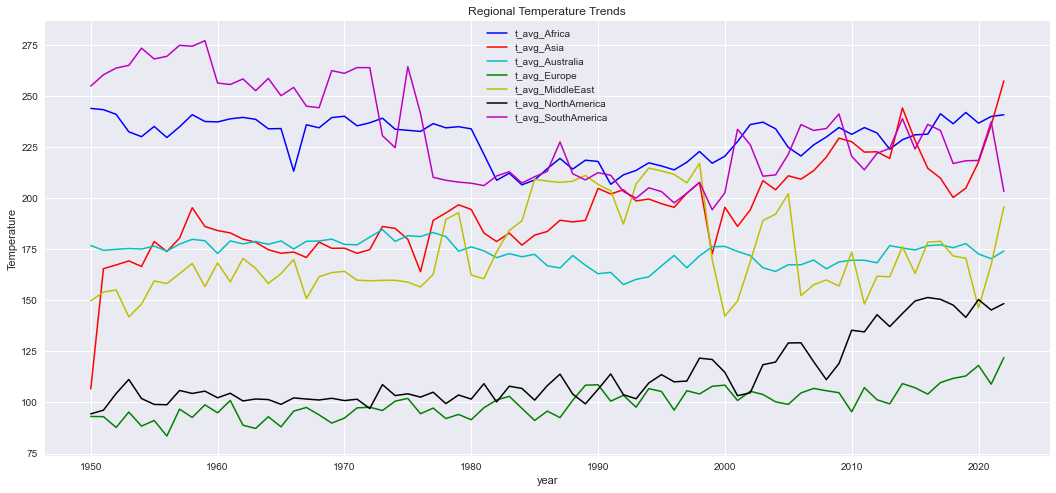

In [443]:
combinedDF2['t_avg'] = (combinedDF2['tmax'] + combinedDF2['tmin']) / 2

#creating DFs based on Regions
AfricaDF = combinedDF2[combinedDF2['region'] == 'Africa']
AsiaDF = combinedDF2[combinedDF2['region'] == 'Asia']
AustraliaDF = combinedDF2[combinedDF2['region'] == 'Australia/South Pacific']
EuropeDF = combinedDF2[combinedDF2['region'] == 'Europe']
MiddleEastDF = combinedDF2[combinedDF2['region'] == 'Middle East']
NorthAmericaDF = combinedDF2[combinedDF2['region'] == 'North America']
SouthAmericaDF = combinedDF2[combinedDF2['region'] == 'South/Central America & Carribean']

#grouping climate zones based on year
AfricaDF_grouped = AfricaDF.groupby('year').mean()
AsiaDF_grouped = AsiaDF.groupby('year').mean()
AustraliaDF_grouped = AustraliaDF.groupby('year').mean()
EuropeDF_grouped = EuropeDF.groupby('year').mean()
MiddleEastDF_grouped = MiddleEastDF.groupby('year').mean()
NorthAmericaDF_grouped = NorthAmericaDF.groupby('year').mean()
SouthAmericaDF_grouped = SouthAmericaDF.groupby('year').mean()

#renaming columns
AfricaDF_grouped.rename(columns = {'t_avg':'t_avg_Africa'}, inplace = True)
AsiaDF_grouped.rename(columns = {'t_avg':'t_avg_Asia'}, inplace = True)
AustraliaDF_grouped.rename(columns = {'t_avg':'t_avg_Australia'}, inplace = True)
EuropeDF_grouped.rename(columns = {'t_avg':'t_avg_Europe'}, inplace = True)
MiddleEastDF_grouped.rename(columns = {'t_avg':'t_avg_MiddleEast'}, inplace = True)
NorthAmericaDF_grouped.rename(columns = {'t_avg':'t_avg_NorthAmerica'}, inplace = True)
SouthAmericaDF_grouped.rename(columns = {'t_avg':'t_avg_SouthAmerica'}, inplace = True)

#joining DFs
regions1DF = pd.merge(pd.merge(pd.merge(AfricaDF_grouped['t_avg_Africa'],AsiaDF_grouped['t_avg_Asia'], on='year'),AustraliaDF_grouped['t_avg_Australia'], on='year'),EuropeDF_grouped['t_avg_Europe'],on='year')
all_regionsDF = pd.merge(pd.merge(pd.merge(regions1DF,MiddleEastDF_grouped['t_avg_MiddleEast'], on='year'),NorthAmericaDF_grouped['t_avg_NorthAmerica'], on='year'),SouthAmericaDF_grouped['t_avg_SouthAmerica'],on='year')

all_regionsDF.plot(linewidth = 1.5, title = 'Regional Temperature Trends',color = ['b','r','c','g','y','k','m'], xlabel ='year',ylabel ='Temperature',figsize=(18,8))


**Rationale:** To directly compare the temp. evolution of regions with eachother, I decided to take 3 steps:

First, creating separate DFs for each region containg their respective data. 
Second, computing the yearly averages for each region by grouping them by year.
Third, using a inner join to put the seperate data back together into one DF. In order to do that I had to rename the columns of the averages of each region. Now I have a dataframe with the data for each region in one column.

We can see that for the majorities of the regions, there is a clear upwards trend in temperatures in recent times.

### 4.3 There are regions and regions...

The defined regions span a wide range of latitudes, that include areas with quite different weather conditions. For studying the evolution of weather in different regions, there could be other ways of grouping the weather stations.

Propose one such method and compute and plot the information with the given grouping.


<AxesSubplot:title={'center':'Climate Zones Temperature Trends'}, xlabel='year', ylabel='Temperature'>

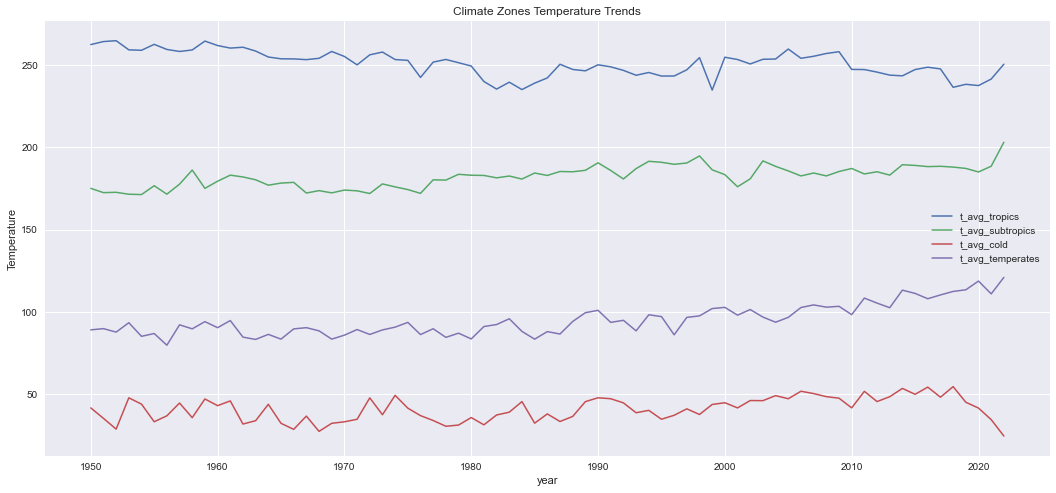

In [430]:
#defining climate zones based on lat
#tropical_zone < 23,5
#subtropics < 40
#temperate_zone < 60
#cold_zone < 90


#computing climate zones
tropicsDF = combinedDF2[(combinedDF2['lat'] > -23.5) & (combinedDF2['lat'] < 23.5)]
subtropicsDF = combinedDF2[((combinedDF2['lat'] < -23.5) & (combinedDF2['lat'] > -40))|((combinedDF2['lat'] > 23.5) & (combinedDF2['lat'] < 40))]
temperatesDF = combinedDF2[((combinedDF2['lat'] < -40) & (combinedDF2['lat'] > -60))|((combinedDF2['lat'] > 40) & (combinedDF2['lat'] < 60))]
coldDF = combinedDF2[((combinedDF2['lat'] < -60) & (combinedDF2['lat'] > -90))|((combinedDF2['lat'] > 60) & (combinedDF2['lat'] < 90))]

#grouping climate zones based on year
tropicsDF_grouped = tropicsDF.groupby('year').mean()
subtropicsDF_grouped = subtropicsDF.groupby('year').mean()
temperatesDF_grouped = temperatesDF.groupby('year').mean()
coldDF_grouped = coldDF.groupby('year').mean()

#renaming columns
tropicsDF_grouped.rename(columns = {'t_avg':'t_avg_tropics'}, inplace = True)
subtropicsDF_grouped.rename(columns = {'t_avg':'t_avg_subtropics'}, inplace = True)
temperatesDF_grouped.rename(columns = {'t_avg':'t_avg_temperates'}, inplace = True)
coldDF_grouped.rename(columns = {'t_avg':'t_avg_cold'}, inplace = True)

#joining DFs
zonesDF = pd.merge(pd.merge(pd.merge(tropicsDF_grouped['t_avg_tropics'],subtropicsDF_grouped['t_avg_subtropics'], on='year'),coldDF_grouped['t_avg_cold'], on='year'),temperatesDF_grouped['t_avg_temperates'],on='year')

zonesDF.plot(linewidth = 1.5, title = 'Climate Zones Temperature Trends', xlabel ='year',ylabel ='Temperature',figsize=(18,8))

**Rationale:** I took a similar approach as for 4.2, however, this time grouping the stations based on their respective latitude and therefore the climatezone they are situated in. Otherwise the steps are the same as in 4.2.

The results show that for subtropics, temperates and cold, there is a clear positve trend in yearly average temperatures. For the tropics regions however, there is no clear trend over the past 70 years.